<a href="https://colab.research.google.com/github/lfreedom2750/MathematicsForComputerScience/blob/main/BT3_23520899.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
np.random.seed(23520899)

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [196]:
def target_function(x, epsilon):
  x = np.array(x)
  return np.sin(1 + pow(x, 2)) + epsilon

def generate_dataset(N):
  x_values = [np.random.random() for _ in range(N)]
  epsilon_list = np.random.normal(0, 0.03, N)
  y_values = target_function(x_values, epsilon_list)
  xy_pairs = list(zip(x_values, y_values))
  return xy_pairs

In [197]:
from sklearn.model_selection import train_test_split

def create_D(M):
  dataset = generate_dataset(M) #Tạo bộ dữ liệu gồm M mẫu
  xy_train, xy_test = train_test_split(dataset, test_size=0.5, random_state=23520899) #Chia đôi bộ dữ liệu N = M/2. Một nửa dành cho tập train. Một nửa còn lại dành cho tập test
  D = (xy_train, xy_test)
  return D

In [198]:
from sklearn.preprocessing import PolynomialFeatures

def data_process(D, degree):
  xy_train = D[0]
  x_train = np.array([xy[0] for xy in xy_train])
  y_train = np.array([xy[1] for xy in xy_train])
  poly = PolynomialFeatures(degree=degree)
  x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
  return x_train_poly, y_train, poly

In [199]:
from sklearn.linear_model import LinearRegression

def train_model(x_train_poly, y_train, degree):
  model = LinearRegression()
  model.fit(x_train_poly, y_train)
  return model

In [200]:
def train_models_with_degrees(D, max_degree):
    models = []
    for degree in range(1, max_degree + 1):
        x_train_poly, y_train, poly_features = data_process(D, degree)
        model = train_model(x_train_poly, y_train, degree)
        models.append((model, poly_features))  # Store both model and PolynomialFeatures
    return models

In [201]:
def plot(D1, D2, D3, models1, models2, models3):
  x_plot = np.linspace(0, 1, 100).reshape(-1, 1)

  fig, axs = plt.subplots(3, 3, figsize=(15, 15))
  fig.suptitle("Polynomial Regression Fits for Degrees 1 to 9")

  for degree in range(1, 10):
      row, col = (degree - 1) // 3, (degree - 1) % 3
      ax = axs[row, col]

      for models, D, label, color in zip([models1, models2, models3], [D1, D2, D3], ['D1', 'D2', 'D3'], ['blue', 'green', 'red']):
          model, poly_features = models[degree - 1]
          x_poly = poly_features.transform(x_plot)
          y_plot = model.predict(x_poly)

          ax.plot(x_plot, y_plot, color=color, label=label)

      for D, color in zip([D1, D2, D3], ['blue', 'green', 'red']):
          X, y = zip(*D[0])
          #scatter(X, y, color=color, s=15)

      ax.set_title(f"Degree {degree}")
      ax.legend()

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

In [202]:
def calculate_mse(D, models):
  x_train, y_train = zip(*D[0])
  x_test, y_test = zip(*D[1])

  results = []

  for degree, (model, poly_features) in enumerate(models):
    x_train_poly = poly_features.transform(np.array(x_train).reshape(-1, 1))
    x_test_poly = poly_features.transform(np.array(x_test).reshape(-1, 1))

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    mse_train = np.mean((y_train_pred - y_train) ** 2)
    mse_test = np.mean((y_test_pred - y_test) ** 2)

    results.append((degree + 1, mse_train, mse_test))

  df_results = pd.DataFrame(results, columns=['Degree', 'E_in', 'E_out'])

    # Make index column as 'Degree' and start from 1
  df_results.reset_index(drop=True, inplace=True)
  df_results['Degree'] = df_results.index + 1  # Change the index to start from 1

    # Styling to add borders to the DataFrame and hide the index
  df_results_styled = df_results.style.set_table_styles(
        [{'selector': 'th', 'props': [('border', '1px solid black')]},  # Border for column headers
         {'selector': 'td', 'props': [('border', '1px solid black')]},  # Border for table data
         {'selector': 'table', 'props': [('border-collapse', 'collapse')]},  # Collapse the borders
         ]
    )

  return df_results_styled

# **Experiment 1:**

Tạo 03 bộ dữ liệu D1, D2, D3. Ban đầu mỗi bộ gồm có M = 20 điểm dữ liệu, sau đó chia đôi, N=10 điểm dữ liệu cho tập train và N=10 điểm dữ liệu còn lại cho tập test.

In [203]:
D1_ex1 = create_D(20)
D2_ex1 = create_D(20)
D3_ex1 = create_D(20)

Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 68 của slides.

In [204]:
model1_ex1 = train_models_with_degrees(D1_ex1, 9)
model2_ex1 = train_models_with_degrees(D2_ex1, 9)
model3_ex1 = train_models_with_degrees(D3_ex1, 9)

Plot minh họa ghép 9 đồ thị vào trong 1 hình.

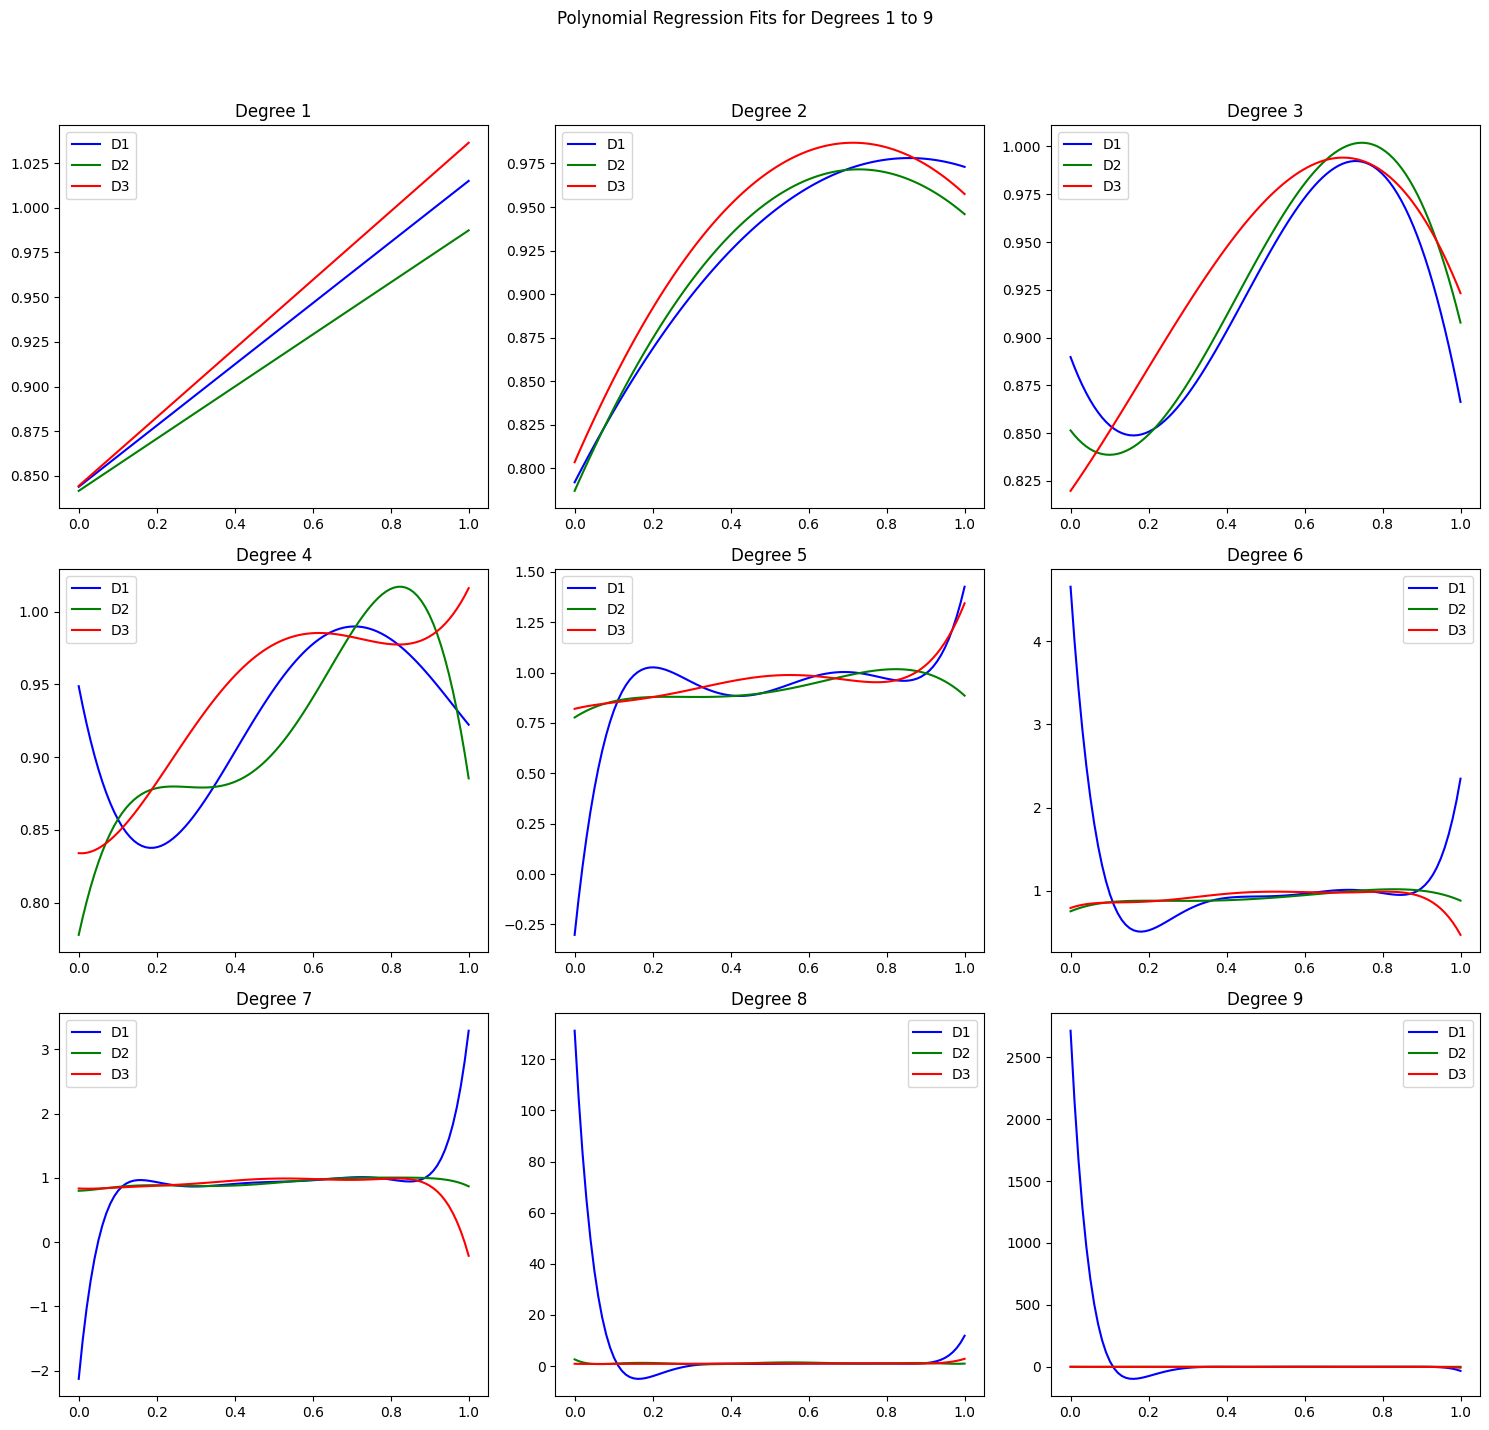

In [205]:
plot(D1_ex1, D2_ex1, D3_ex1, model1_ex1, model2_ex1, model3_ex1)

Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 66 của slides.

In [206]:
D1_experiment1_mse = calculate_mse(D1_ex1, model1_ex1)
D1_experiment1_mse

,Degree,E_in,E_out
0,1,0.000882,0.000850
1,2,0.000691,0.001189
2,3,0.000392,0.000942
3,4,0.000383,0.001766
4,5,0.000260,0.116777
5,6,0.000186,1.192382
6,7,0.000172,0.703060
7,8,0.000120,1336.786161
8,9,0.000000,569728.366108


# **Experiment 2:**

Tạo 03 bộ dữ liệu D1, D2, D3. Ban đầu mỗi bộ gồm có M = 200 điểm dữ liệu, sau đó chia đôi, N=100 điểm dữ liệu cho tập train và N=100 điểm dữ liệu còn lại cho tập test.

In [207]:
D1_ex2 = create_D(200)
D2_ex2 = create_D(200)
D3_ex2 = create_D(200)

Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 68 của slides.

In [208]:
model1_ex2 = train_models_with_degrees(D1_ex2, 10)
model2_ex2 = train_models_with_degrees(D2_ex2, 10)
model3_ex2 = train_models_with_degrees(D3_ex2, 10)

Plot minh họa ghép 9 đồ thị vào trong 1 hình.

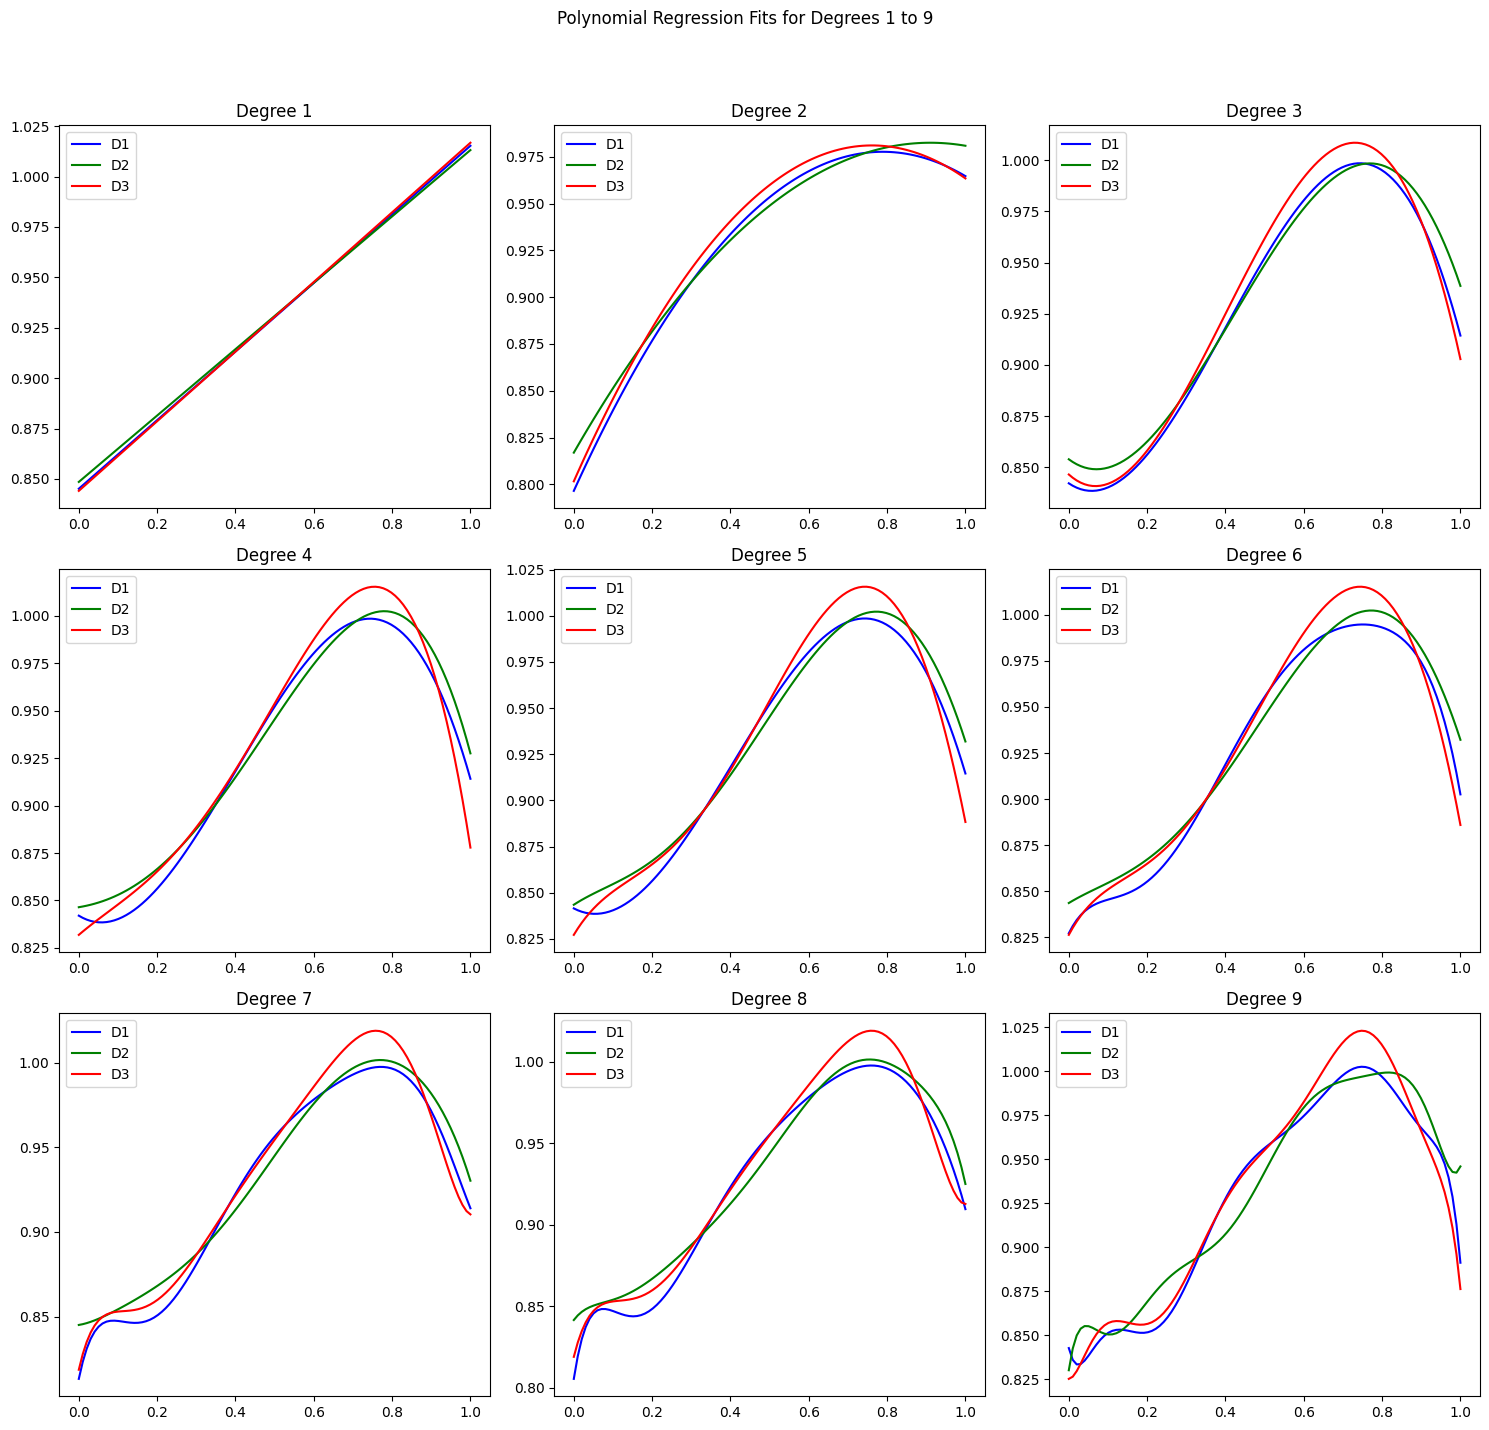

In [209]:
plot(D1_ex2, D2_ex2, D3_ex2, model1_ex2, model2_ex2, model3_ex2)

Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 66 của slides.

In [210]:
D1_experiment2_mse = calculate_mse(D1_ex2, model1_ex2)
D1_experiment2_mse

,Degree,E_in,E_out
0,1,0.001737,0.001520
1,2,0.001239,0.001208
2,3,0.000880,0.001004
3,4,0.000880,0.001004
4,5,0.000880,0.001005
5,6,0.000870,0.001000
6,7,0.000862,0.001001
7,8,0.000861,0.001005
8,9,0.000846,0.001057
9,10,0.000837,0.001107


# **Experiment 3:**

Tạo 03 bộ dữ liệu D1, D2, D3. Ban đầu mỗi bộ gồm có M = 2000 điểm dữ liệu, sau đó chia đôi, N=1000 điểm dữ liệu cho tập train và N=1000 điểm dữ liệu còn lại cho tập test.

In [211]:
D1_ex3 = create_D(2000)
D2_ex3 = create_D(2000)
D3_ex3 = create_D(2000)

Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 68 của slides.

In [212]:
model1_ex3 = train_models_with_degrees(D1, 10)
model2_ex3 = train_models_with_degrees(D2, 10)
model3_ex3 = train_models_with_degrees(D3, 10)

Plot minh họa ghép 9 đồ thị vào trong 1 hình.

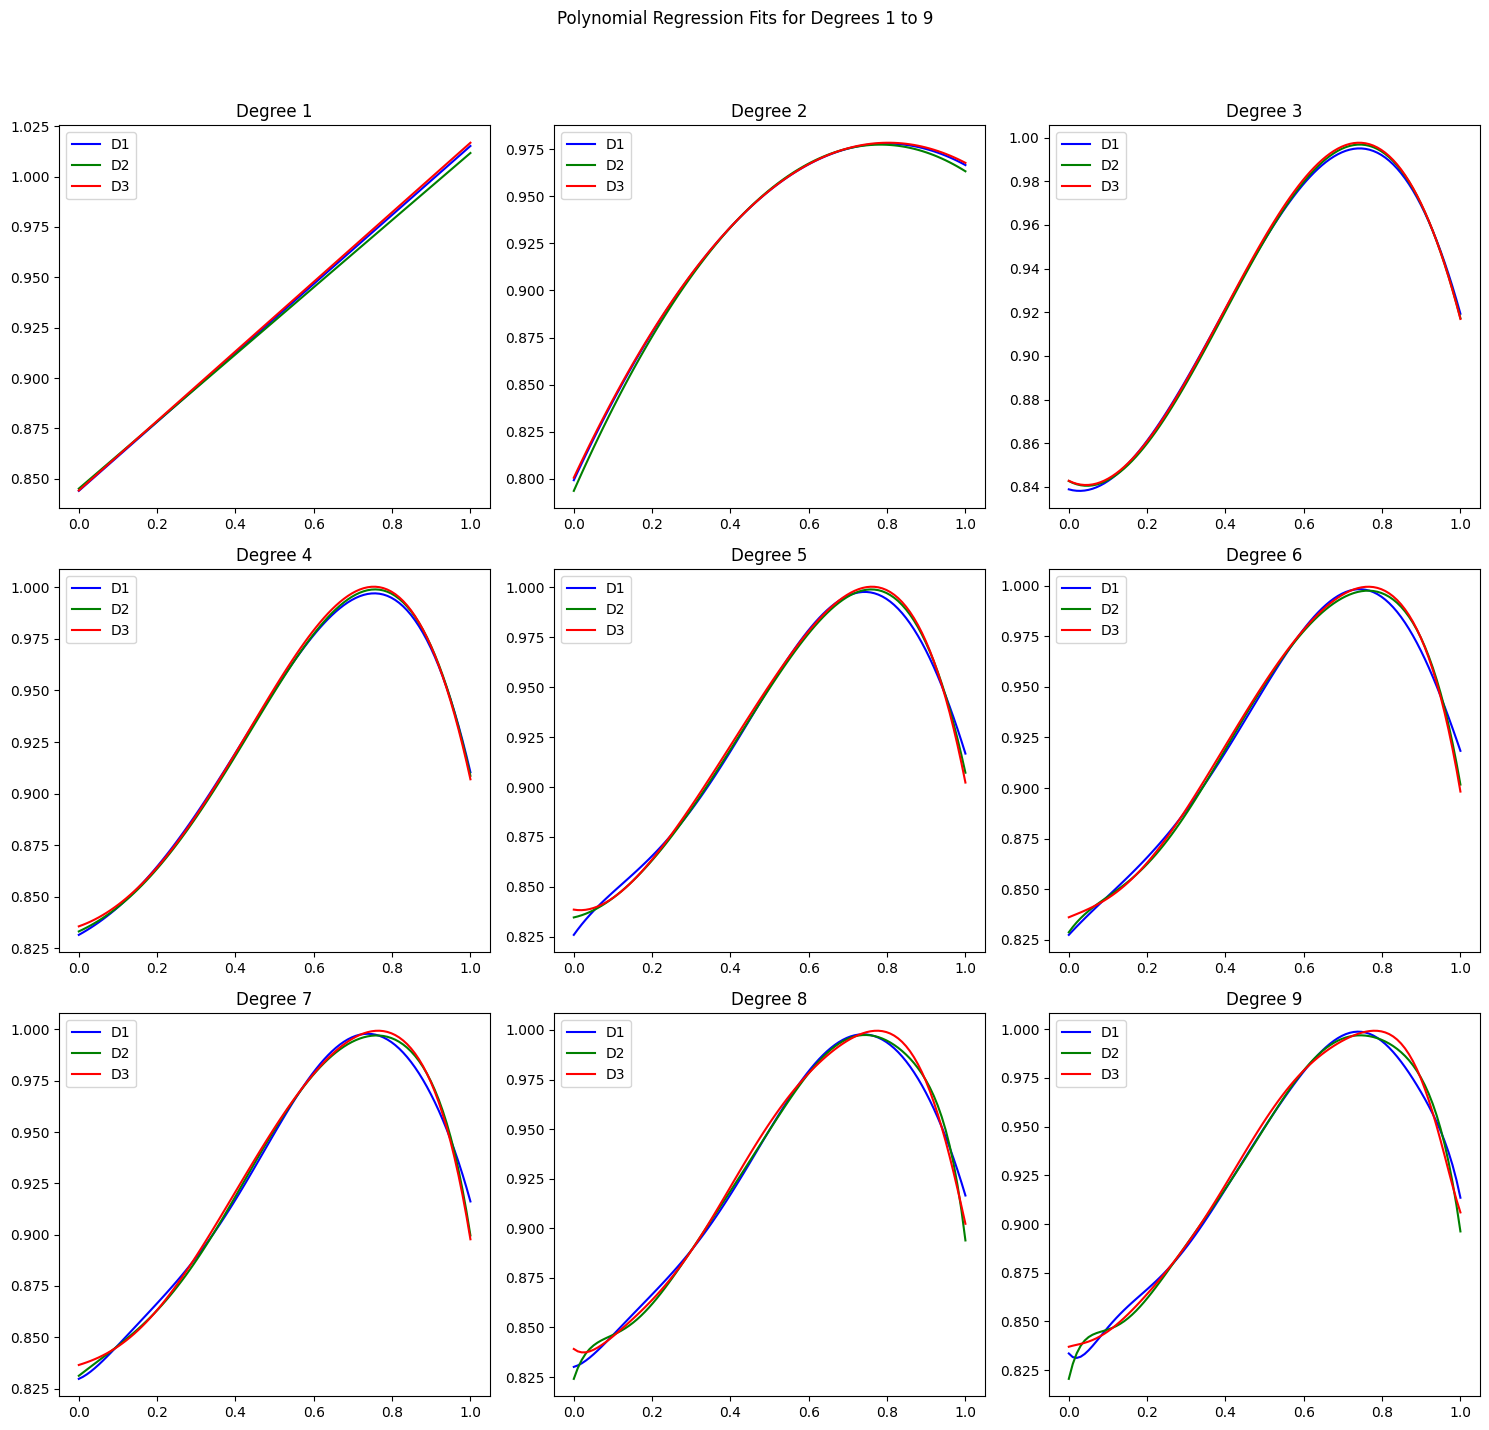

In [213]:
plot(D1_ex3, D2_ex3, D3_ex3, model1, model2, model3)

Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 66 của slides.

In [214]:
D1_experiment3_mse = calculate_mse(D1_ex3, model1_ex3)
D1_experiment3_mse

,Degree,E_in,E_out
0,1,0.001577,0.001637
1,2,0.001148,0.001209
2,3,0.000890,0.000906
3,4,0.000883,0.000902
4,5,0.000880,0.000899
5,6,0.000880,0.000901
6,7,0.000879,0.000899
7,8,0.000879,0.000900
8,9,0.000879,0.000900
9,10,0.000877,0.000904


# **Trả lời các câu hỏi sau:**

1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?

Bias (sai lệch hệ thống) thường giảm khi độ phức tạp của mô hình tăng lên. Khi mô hình đơn giản, nó có thể không đủ khả năng để học được mối quan hệ phức tạp trong dữ liệu, dẫn đến sai lệch cao. Tuy nhiên, khi độ phức tạp của mô hình tăng lên (chẳng hạn như thêm các lớp trong mạng neural network hoặc thêm các tham số trong mô hình hồi quy), mô hình sẽ có khả năng "fit" tốt hơn dữ liệu, từ đó làm giảm bias.


2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?

Variance (phương sai) có xu hướng tăng khi độ phức tạp của mô hình tăng lên. Mô hình phức tạp hơn sẽ "fit" dữ liệu huấn luyện một cách chính xác hơn, nhưng có thể trở nên quá khớp (overfitting) và dễ bị ảnh hưởng bởi những biến động nhỏ trong tập huấn luyện. Điều này có nghĩa là mô hình sẽ có sự biến thiên lớn hơn khi áp dụng vào tập kiểm tra, dẫn đến tăng variance.

3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?

Tăng kích thước của tập huấn luyện sẽ không ảnh hưởng trực tiếp đến bias. Bias là đặc điểm của mô hình và thường liên quan đến sự đơn giản của mô hình so với độ phức tạp của dữ liệu. Bias chủ yếu phụ thuộc vào độ phức tạp của mô hình. Tuy nhiên, khi có một tập huấn luyện lớn hơn, mô hình có thể học được những đặc điểm phức tạp hơn trong dữ liệu, giúp giảm thiểu bias trong trường hợp mô hình chưa đủ phức tạp để học hết các đặc điểm đó.


4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?

Tăng kích thước của tập huấn luyện có xu hướng giảm variance. Khi tập huấn luyện lớn hơn, mô hình có thể học được nhiều mẫu dữ liệu hơn, giúp mô hình trở nên ổn định và tổng quát hơn. Điều này giúp giảm sự phụ thuộc vào các đặc điểm ngẫu nhiên trong dữ liệu huấn luyện và làm giảm khả năng bị overfitting.

**Vẽ thêm một số đồ thị có trong slide từ slide 58-70:**

**Đồ thị In-sample and Out-of-sample errors cho tập dữ liệu D1 của mỗi thí nghiệm như trang 67 của slide**

In [215]:
def plot_in_out_sample_errors(df_results):
    # Vẽ biểu đồ In-sample và Out-of-sample errors
    plt.figure(figsize=(8, 6))
    plt.plot(df_results['Degree'], df_results['E_in'], 'bo-', label="In-sample (E_in)", alpha=0.8)
    plt.plot(df_results['Degree'], df_results['E_out'], 'ro-', label="Out-of-sample (E_out)", alpha=0.8)

    # Thêm thông tin vào biểu đồ
    plt.title("In-sample and Out-of-sample errors", fontsize=14)
    plt.xlabel("Complexity (degree of polynomial)", fontsize=12)
    plt.ylabel("MSE", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Experiment 1:

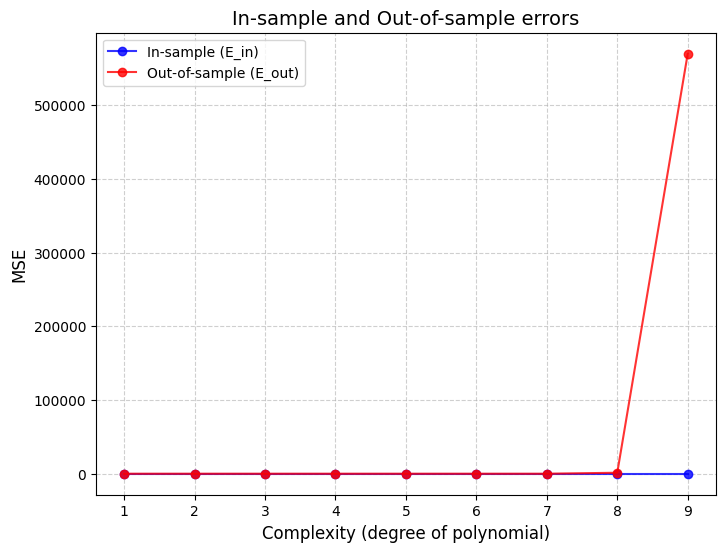

In [216]:
plot_in_out_sample_errors(D1_experiment1_mse.data)

Experiment 2:

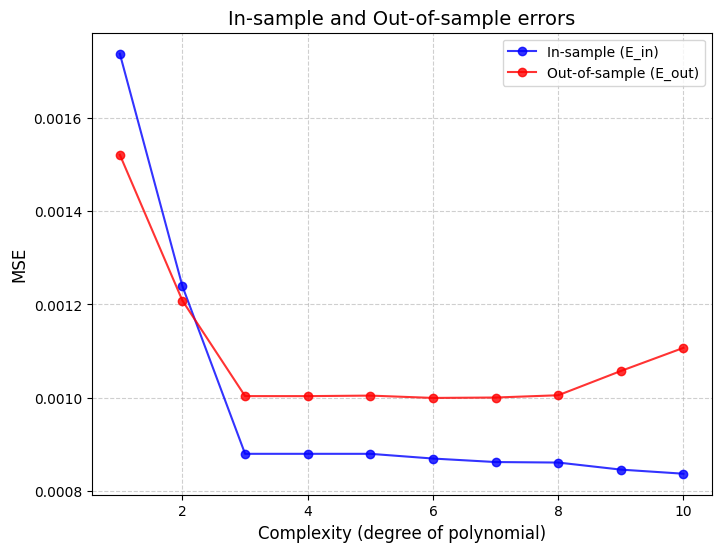

In [217]:
plot_in_out_sample_errors(D1_experiment2_mse.data)

Experiment 3:

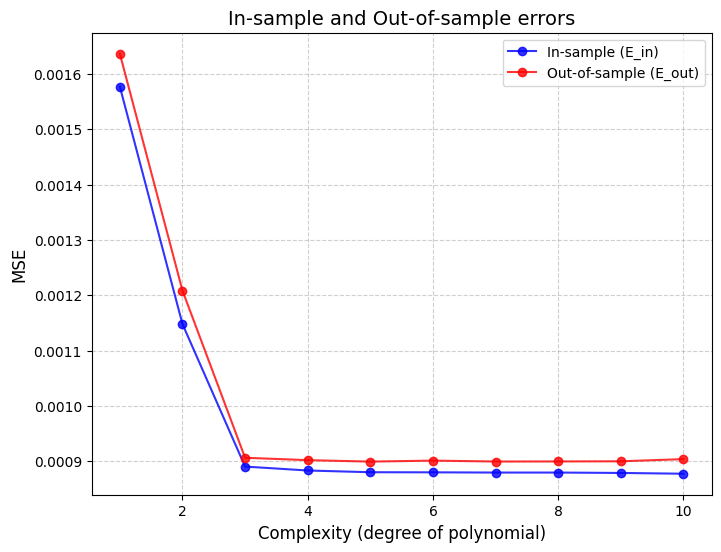

In [218]:
plot_in_out_sample_errors(D1_experiment3_mse.data)

**Đồ thị Polynomial Regression Fits for Degrees 1 to 9 (With scatter) cho tập dữ liệu D1 của mỗi thí nghiệm như trang 65 của slide**

In [219]:
 def plot_with_scatter(D1, D2, D3, models1, models2, models3):
  x_plot = np.linspace(0, 1, 100).reshape(-1, 1)

  fig, axs = plt.subplots(3, 3, figsize=(15, 15))
  fig.suptitle("Polynomial Regression Fits for Degrees 1 to 9 (With scatter)")

  for degree in range(1, 10):
      row, col = (degree - 1) // 3, (degree - 1) % 3
      ax = axs[row, col]

      for models, D, label, color in zip([models1, models2, models3], [D1, D2, D3], ['D1', 'D2', 'D3'], ['blue', 'green', 'red']):
          model, poly_features = models[degree - 1]
          x_poly = poly_features.transform(x_plot)
          y_plot = model.predict(x_poly)

          ax.plot(x_plot, y_plot, color=color, label=label)

      for D, color, marker in zip([D1, D2, D3], ['blue', 'green', 'red'], ['+', 'o', 'x']):
          X, y = zip(*D[0])
          ax.scatter(X, y, color=color, s=15, marker=marker, label=f"{label} scatter")

      ax.set_title(f"Degree {degree}")
      ax.legend()

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

Experiment 1:

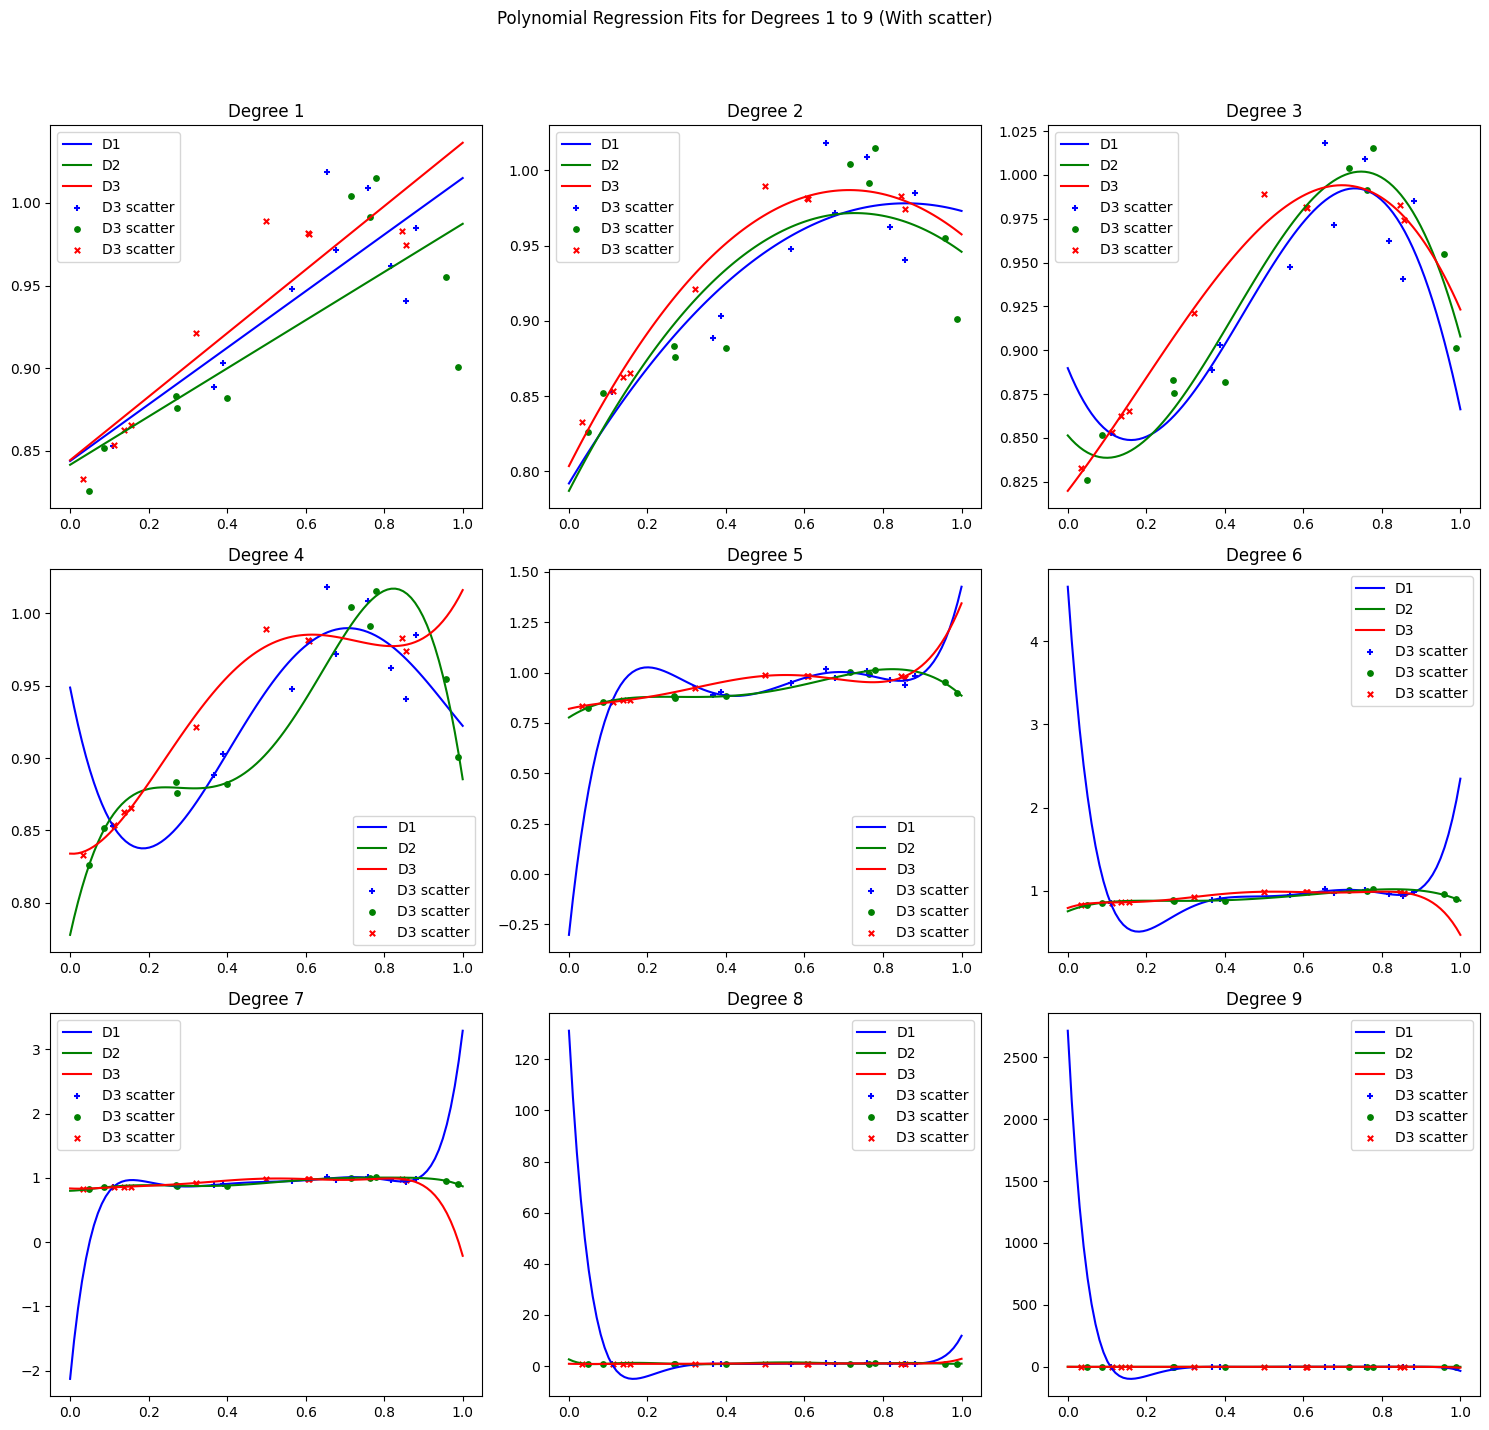

In [220]:
plot_with_scatter(D1_ex1, D2_ex1, D3_ex1, model1_ex1, model2_ex1, model3_ex1)

Experiment 2:

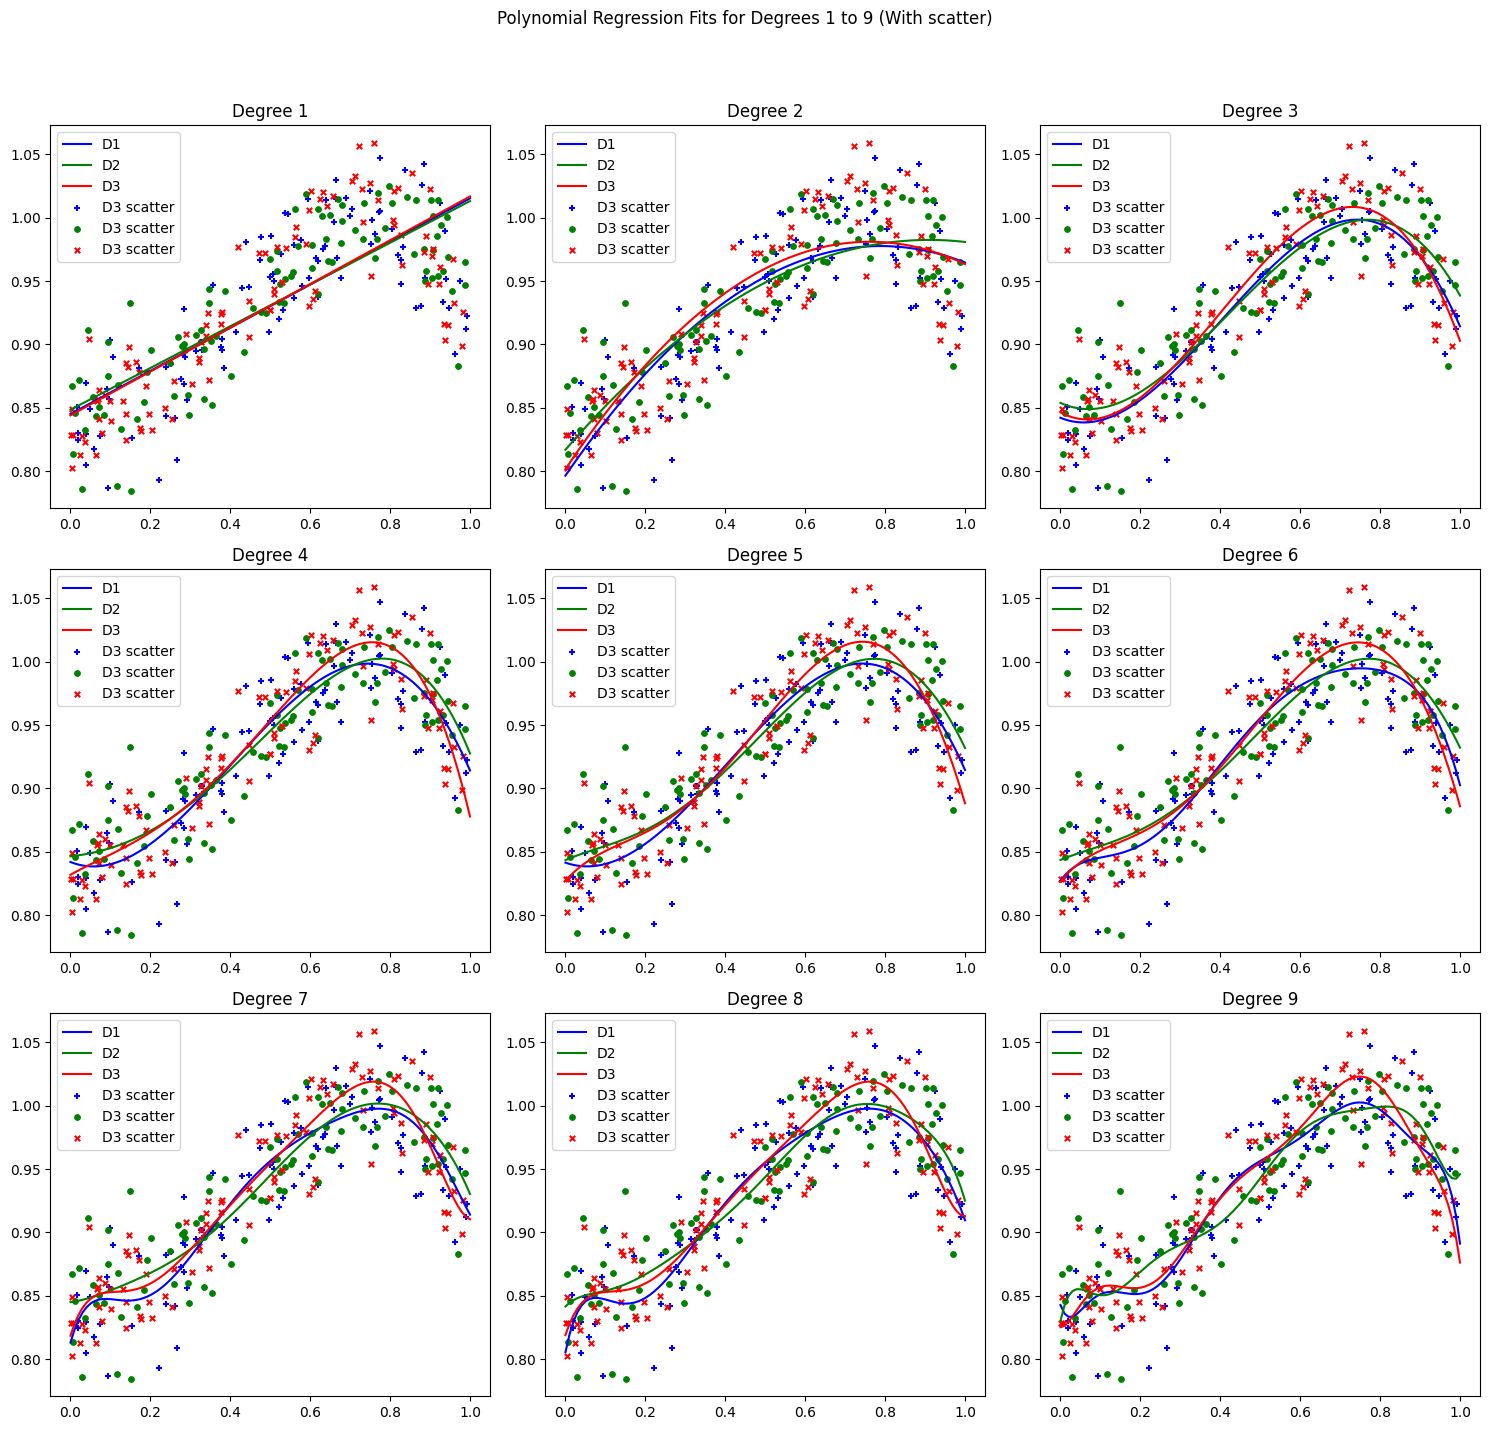

In [221]:
plot_with_scatter(D1_ex2, D2_ex2, D3_ex2, model1_ex2, model2_ex2, model3_ex2)

Experiment 3:

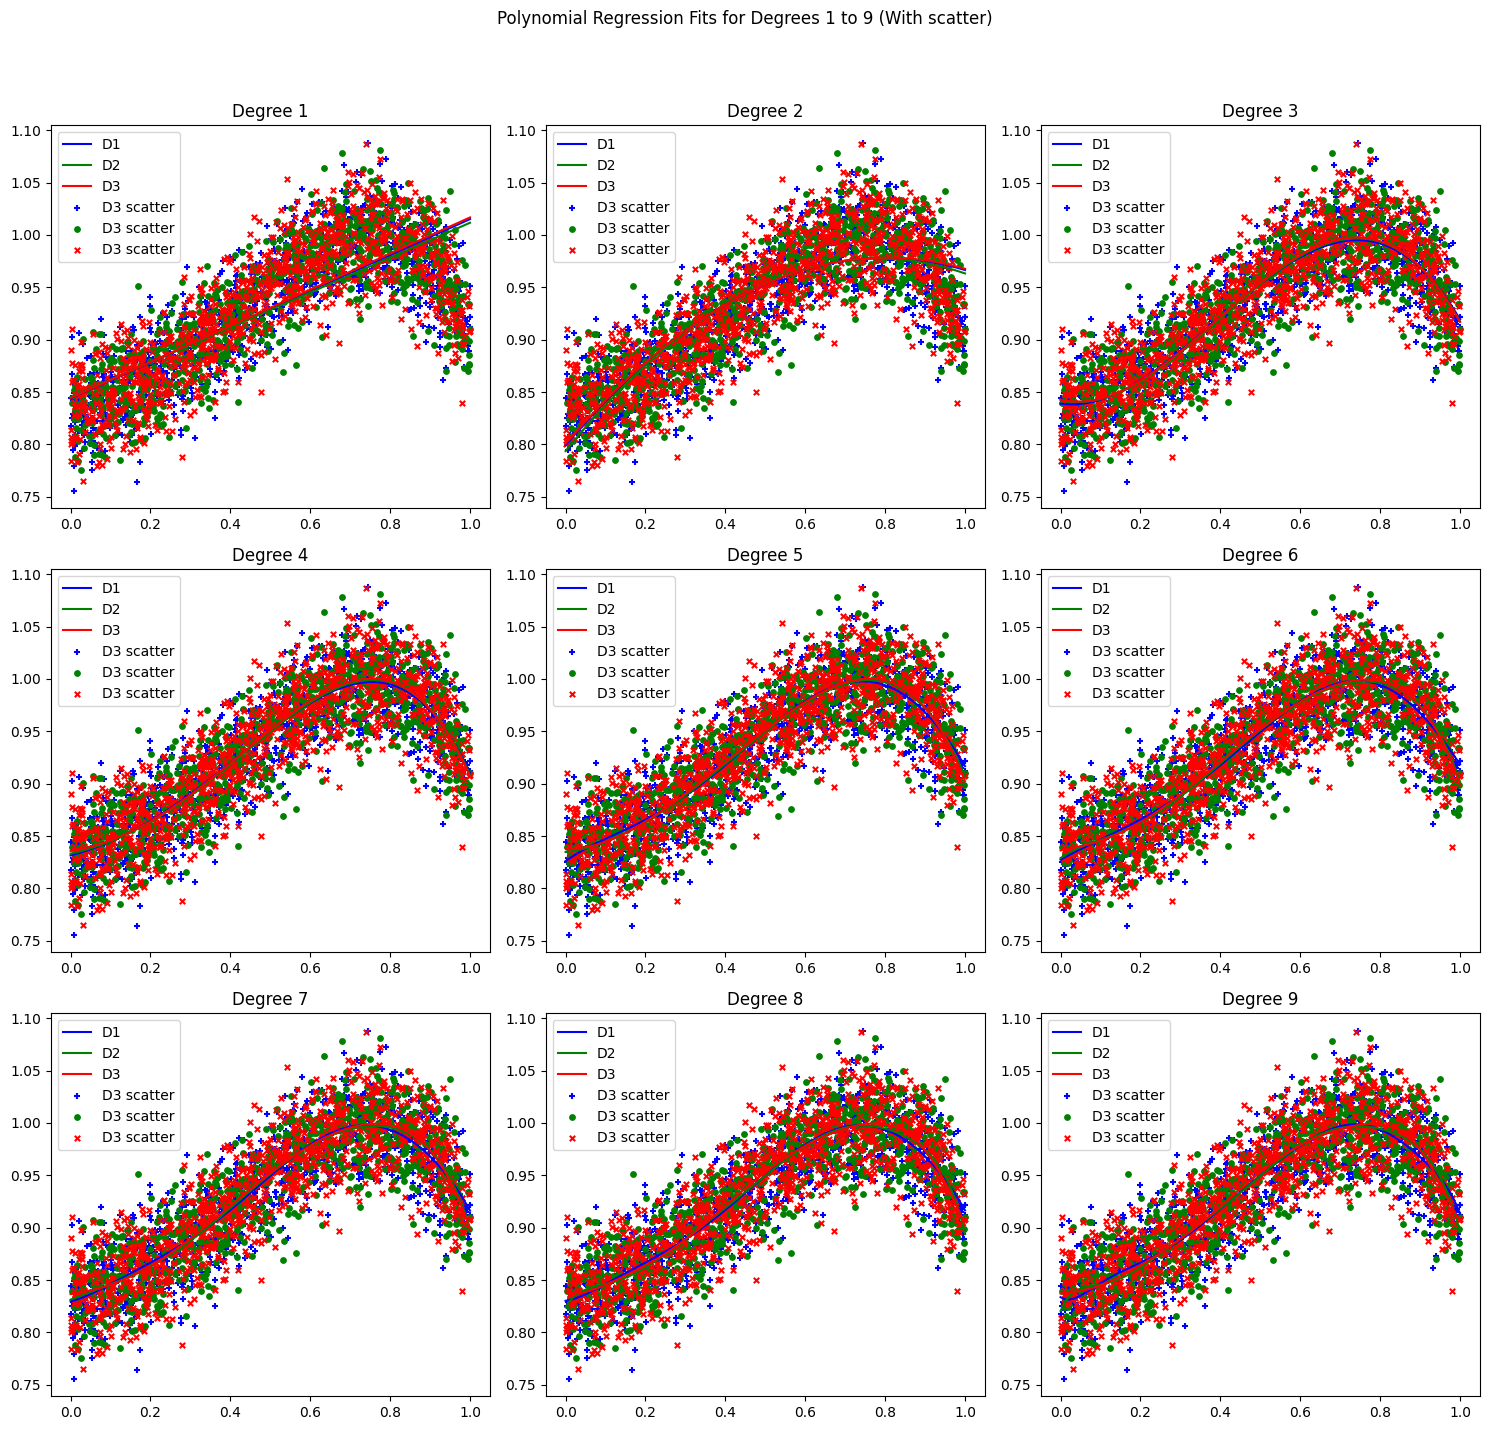

In [222]:
plot_with_scatter(D1_ex3, D2_ex3, D3_ex3, model1_ex3, model2_ex3, model3_ex3)

Vẽ đồ thị target signal function sin(1+ $x^2$) như trang 58 của slides

In [223]:
def f(x):
  return np.sin(1 + pow(x, 2))

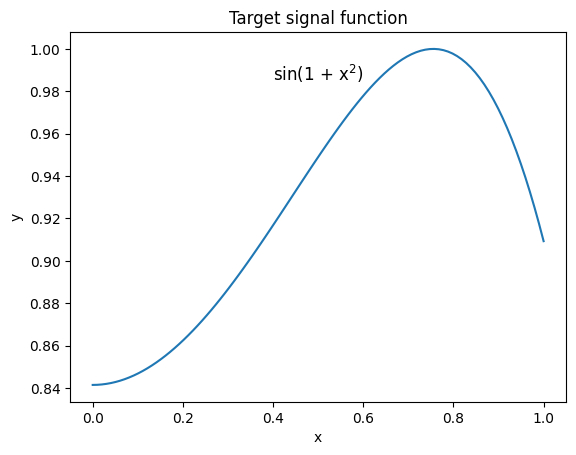

In [224]:
x = np.linspace(0, 1, 100)
y = f(x)

plt.plot(x, y)
plt.text(0.5, 0.985, "sin(1 + x$^2$)", fontsize=12, color='black', ha='center')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Target signal function")
plt.show()